#### En el presente archivo se llevan a cabo las pruebas y graficas para encontrar la profundidad maxima optima para el modelo de arbol de deciciones.
#### Para una explicacion detallada de esto ver el punto 2 del README

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt


In [6]:
df = pd.read_parquet('Datasets/train_modified.parquet', engine='pyarrow')

Se hacen pruebas para calcular el accuracy y el recall con distintas profundidades

In [ ]:
X = df.drop(columns=['isLow', 'price'])#seleccinamos las variables features
y = df.isLow#seleccionamos la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y)#dividimos la data (por defecto 75:25)

In [ ]:
depthAcc_train = {}
depthRec_train = {}
depthAcc_test = {}
depthRec_test = {}
for k in range(1, 200):
    clf = DecisionTreeClassifier(max_depth=k)
    clf = clf.fit(X_train,y_train)
    
    #predecimos el propio train y calculamos accuracy/recall
    y_pred = clf.predict(X_train)
    
    depthAcc_train[k] = accuracy_score(y_train, y_pred)
    depthRec_train[k] = recall_score(y_train, y_pred)

    y_pred = 0#reiniciamos la variable por si acaso

    #predecimos el test y calculamos accuracy/recall
    y_pred = clf.predict(X_test)
    
    depthAcc_test[k] = accuracy_score(y_test, y_pred)
    depthRec_test[k] = recall_score(y_test, y_pred)

Se guardan los resultados de las pruebas con train

In [ ]:
depth_tests_train = pd.DataFrame()
depth_tests_train['depth'] = depthAcc_train.keys()
depth_tests_train['accuracy'] = depthAcc_train.values()
depth_tests_train['recallScore'] = depthRec_train.values()

In [ ]:
depth_tests_train.to_csv('tests_results/depth_train.csv', sep=';', mode='a', index=False, header=True)

Se guardan los resultados de las pruebas con test

In [ ]:
depth_tests_test = pd.DataFrame()
depth_tests_test['depth'] = depthAcc_test.keys()
depth_tests_test['accuracy'] = depthAcc_test.values()
depth_tests_test['recallScore'] = depthRec_test.values()

In [ ]:
depth_tests_test.to_csv('tests_results/depth_test.csv', sep=';', mode='a', index=False, header=True)

Graficas para comparar el accuracy/recall con las distintas profundidades

In [3]:
df_depthTest = pd.read_csv('tests_results/depth_test.csv', sep=';')
df_depthTrain = pd.read_csv('tests_results/depth_train.csv', sep=';')

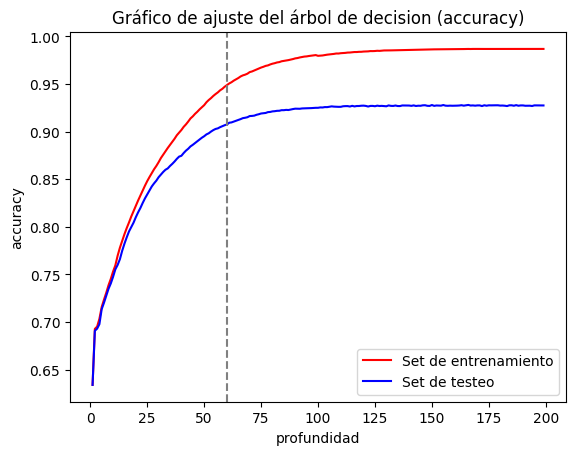

In [11]:
plt.figure()
plt.plot(df_depthTrain['depth'], df_depthTrain['accuracy'], color='r', label='Set de entrenamiento')
plt.plot(df_depthTest['depth'], df_depthTest['accuracy'], color='b', label='Set de testeo')
plt.axvline(x=60, color = 'grey', linestyle="--")
plt.title('Gráfico de ajuste del árbol de decision (accuracy)', fontsize = 12)
plt.legend()
plt.xlabel("profundidad")
plt.ylabel("accuracy")
plt.show()

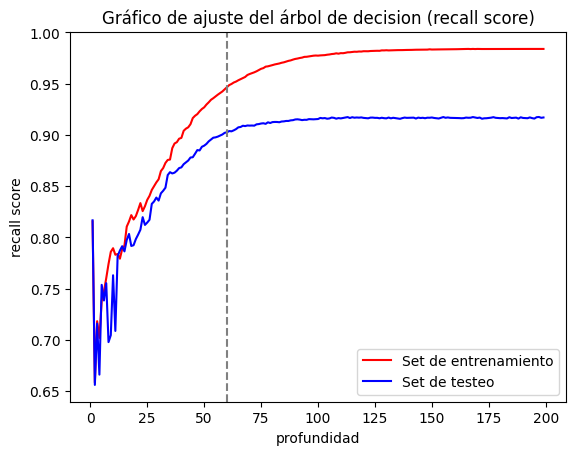

In [10]:
plt.figure()
plt.plot(df_depthTrain['depth'], df_depthTrain['recallScore'], color='r', label='Set de entrenamiento')
plt.plot(df_depthTest['depth'], df_depthTest['recallScore'], color='b', label='Set de testeo')
plt.axvline(x=60, color = 'grey', linestyle="--")
plt.title('Gráfico de ajuste del árbol de decision (recall score)', fontsize = 12)
plt.legend()
plt.xlabel("profundidad")
plt.ylabel("recall score")
plt.show()

Test con la profundidad elegida

In [7]:
X = df.drop(columns=['isLow', 'price'])#seleccinamos las variables features
y = df.isLow#seleccionamos la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y)#dividimos la data (por defecto 75:25)

In [8]:
clf = DecisionTreeClassifier(max_depth=60)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [9]:
acc = accuracy_score(y_test, y_pred)
print('acc = '+str(acc))
rec = recall_score(y_test, y_pred)
print('rec = '+str(rec))


acc = 0.9092278108565206
rec = 0.8981067644252498
